# MNIST autoencoder from nnBuilder

A basic convolutional autoencoder for MNIST

In [1]:
import numpy as np
import tensorflow as tf
import sys, os, seaborn, time
import matplotlib.pyplot as plt
sys.path.append('../nnBuilder')
from nnLayer import *
from nnInput import *
from nnTrainer import *
from nnHandler import *
from nnAuto import *

In [2]:
data=Layer(type="MNIST",batch=128)
data_test=Layer(type="MNIST",test=True)
'''encoder=[]
encoder.append(dict(type="Convolution",pad="SAME",window=5,stride=1,size=2,relu=True))
encoder.append(dict(type="Pool",pad="SAME",window=2,stride=2,pool_type="max"))
encoder.append(dict(type="Convolution",pad="SAME",window=5,stride=1,size=4,relu=True))
encoder.append(dict(type="Pool",pad="SAME",window=2,stride=2,pool_type="max"))
decoder=[]
decoder.append(dict(type="Relu",size=49*4))
decoder.append(dict(type="Reshape",shape=[-1,7,7,4]))
decoder.append(dict(type="Convolution_Transpose",pad="SAME",window=5,stride=2,size=2,relu=True))
decoder.append(dict(type="Convolution_Transpose",pad="SAME",window=5,stride=2,size=1,relu=False))'''
#decoder.append(dict(type="Sigmoid_Feature"))
encoder=[]
encoder.append(dict(type="Relu",size=512))
encoder.append(dict(type="Relu",size=256))
decoder=[]
decoder.append(dict(type="Relu",size=256))
decoder.append(dict(type="Relu",size=512))
decoder.append(dict(type="Linear",size=784))
decoder.append(dict(type="Reshape",shape=[-1,28,28,1]))



autoencoder=Layer(x=data,type="Variational_Autoencoder",encoder=encoder,decoder=decoder,
                  mean=dict(type="Linear",size=2))
autoencoder_eval=autoencoder.copy(x=data,test=True)
autoencoder_test=autoencoder.copy(x=data_test,test=True)

trainer=LabeledTrainer(network=autoencoder,optimizer="adam",loss="network")
tester_eval=LabeledTrainer(network=autoencoder_eval,loss="network",test=True)
tester=LabeledTrainer(network=autoencoder_test,loss="network",test=True)

#trainer_start=LabeledTrainer(network=autoencoder,optimizer="adam",loss="mean_squared_error")

sess=SessManager()

Extracting /tmp/tensorflow/mnist/input_data\train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-labels-idx1-ubyte.gz
train
Extracting /tmp/tensorflow/mnist/input_data\train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-labels-idx1-ubyte.gz
test


1.00918
1.01314


<IPython.core.display.Javascript object>


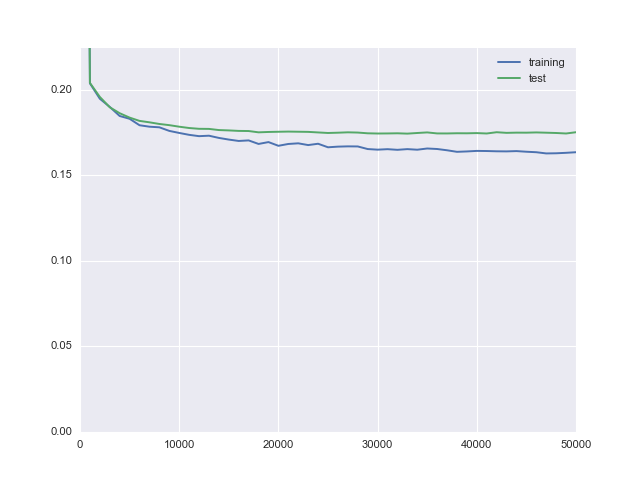

0.203664
0.203894


0.194653
0.195705


0.18987
0.189667


0.184573
0.186192


0.182943
0.183629


0.17917
0.181709


0.178319
0.180878


0.177958
0.179911


0.175869
0.179224


0.17467
0.178318


0.173568
0.17755


0.172789
0.17709


0.173059
0.177031


0.171764
0.176357


0.170799
0.176146


0.169988
0.175862


0.17031
0.17579


0.168244
0.175027


0.169333
0.175244


0.167168
0.17536


0.168231
0.175466


0.168608
0.175378


0.167585
0.175295


0.168363
0.174967


0.166292
0.174647


0.166673
0.174812


0.166834
0.175035


0.166784
0.174892


0.165265
0.174462


0.164905
0.174338


0.165191
0.174381


0.164814
0.17447


0.165224
0.174271


0.164877
0.174642


0.165587
0.174978


0.165295
0.17439


0.164548
0.174375


0.163643
0.174494


0.163869
0.174464


0.164178
0.174584


0.164111
0.174354


0.163954
0.175093


0.163897
0.174721


0.16407
0.17485


0.163697
0.174827


0.163409
0.17497


0.162709
0.17481


0.162796
0.174642


0.163061
0.174353


0.163411
0.175092


In [3]:
batches_per_step=1000#60000//128 #About 1 epoch
batches_per_eval=100
n_steps=50
#trainer_start.train(1000,learn_rate=1e-3)
def make_plt():
    %matplotlib notebook
    global fig,ax,train_plot,test_plot#,eval_plot
    fig,ax = plt.subplots(1,1)
    train_plot=ax.plot([],[], label="training")[0]
    #eval_plot=ax.plot([],[], label="eval")[0]
    test_plot=ax.plot([],[], label="test")[0]
    ax.set_ylim(0,1)
    plt.legend()
    fig.canvas.draw()
    time.sleep(.01)
def update_plt():
    x=[batches_per_step*i for i in range(len(trains))]
    train_plot.set_xdata(x)
    train_plot.set_ydata(trains)
    test_plot.set_xdata(x)
    test_plot.set_ydata(tests)
    #eval_plot.set_xdata(x)
    #eval_plot.set_ydata(evals)
    ax.set_xlim(0,x[-1])
    ax.set_ylim(0,tests[1]*1.1)
    fig.canvas.draw()
    #time.sleep(.01)
if "trains" not in globals():
    trains=[trainer.eval_loss(n=batches_per_eval)]
    #evals=[trainer_eval.eval_loss(n=batches_per_eval)]
    tests=[tester.eval_loss()]
make_plt()
for i in range(n_steps):
    trainer.train(batches_per_step,learn_rate=1e-3)
    trains.append(trainer.eval_loss(n=batches_per_eval)) 
    #evals.append(trainer_eval.eval_loss(n=batches_per_eval)) 
    tests.append(tester.eval_loss())
    show(-sess.run(autoencoder)[0,:,:,0])
    show(-autoencoder.generate()[0,:,:,0])
    update_plt()

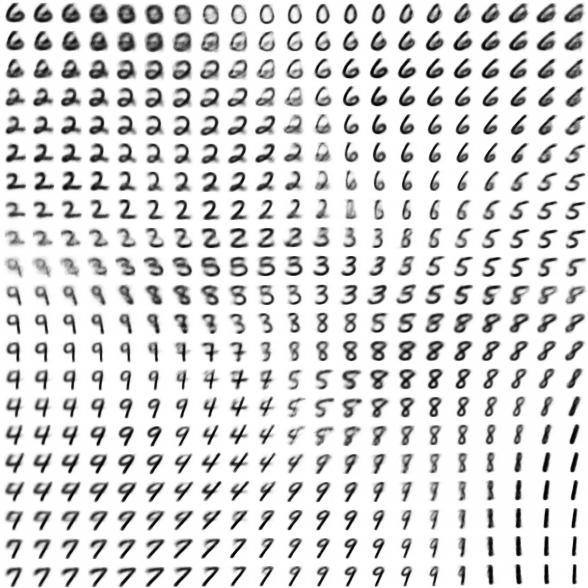

In [4]:
p=10
step=0.1
x=[[step*n,step*m] for n in range(-p,p+1) for m in range(-p,p+1)]
y=autoencoder.decode(x).reshape(2*p+1,2*p+1,28,28)
show(-composite(y))